In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
N_ITERATION = 100
plot = None
for METHOD in ['IC','UM10','UM50']:
    df = pd.read_csv("data/experiment_2_method_%s_profile_%s.csv"%(METHOD,N_ITERATION))
    df['Methods'] = METHOD
    if type(plot) == None:
        plot = pd.DataFrame(columns=df.columns)
    plot = pd.concat([plot,df])  
plot.head()

,perc_rows,number_rows,number_proposals,number_individuals,simulation,RANK(WR),RANK(COP),RANK(STD),RANK(DIV(WR)),RANK(DIV(COP)),...,"KT(WR,RANK(DIV(COP)))","KT(RANK(DIV(WR)),STD)","KT(RANK(DIV(WR)),COP)","KT(RANK(DIV(WR)),RANK(DIV(COP)))","KT(RANK(DIV(COP)),STD)","KT(RANK(DIV(COP)),COP)","KT(RANK(DIV(COP)),RANK(DIV(WR)))",Methods,len1,len2
0,10.0,2,3,100,0,"[1, 0, 2]","[1, 0, 2]","[0, 1, 2]","[0, 1, 2]","[0, 1, 2]",...,0.333333,1.000000,0.333333,1.000000,1.0,0.333333,1.000000,IC,NaN,NaN
1,20.0,2,3,100,0,"[1, 0, 2]","[1, 0, 2]","[0, 1, 2]","[0, 1, 2]","[0, 1, 2]",...,0.333333,1.000000,0.333333,1.000000,1.0,0.333333,1.000000,IC,NaN,NaN
2,30.0,2,3,100,0,"[1, 0, 2]","[1, 0, 2]","[0, 1, 2]","[0, 2, 1]","[0, 1, 2]",...,0.333333,0.333333,-0.333333,0.333333,1.0,0.333333,0.333333,IC,NaN,NaN
3,40.0,3,3,100,0,"[1, 0, 2]","[1, 0, 2]","[0, 1, 2]","[0, 2, 1]","[0, 1, 2]",...,0.333333,0.333333,-0.333333,0.333333,1.0,0.333333,0.333333,IC,NaN,NaN
4,50.0,3,3,100,0,"[1, 0, 2]","[1, 0, 2]","[0, 1, 2]","[0, 2, 1]","[0, 1, 2]",...,0.333333,0.333333,-0.333333,0.333333,1.0,0.333333,0.333333,IC,NaN,NaN


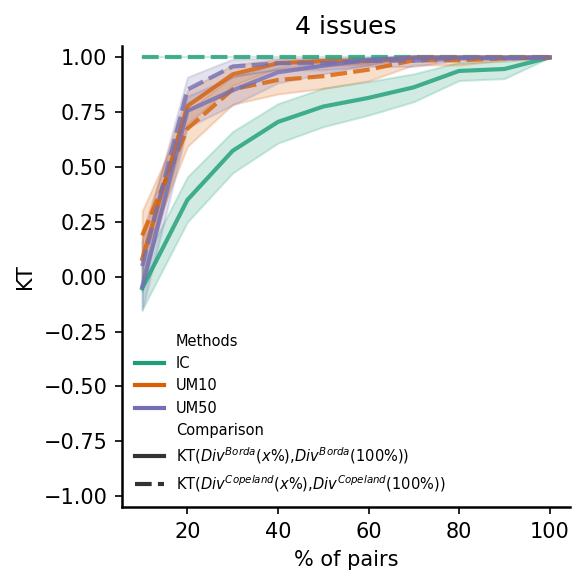

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
number_p = 4

aux = plot[(plot['number_proposals']==number_p) &\
           (plot['number_individuals']==1000)]\
    .melt(id_vars=['perc_rows','Methods'], value_vars=['Rob(DIV,WR)', 'Rob(DIV,COP)'])

aux['Comparison']= None
aux.loc[aux['variable']=='Rob(DIV,WR)','Comparison']= "KT($\mathit{Div}^\mathit{Borda}(x\%)$,$\mathit{Div}^\mathit{Borda}(100\%)$)"
aux.loc[aux['variable']=='Rob(DIV,COP)', 'Comparison']= "KT($\mathit{Div}^\mathit{Copeland}(x\%)$,$\mathit{Div}^\mathit{Copeland}(100\%)$)"
aux.head()

fig, ax = plt.subplots(figsize=(4,4), dpi=150)

g = sns.lineplot(data=aux.dropna(), \
             x='perc_rows', y='value',\
                 hue='Methods',
             linewidth=2, 
                 style='Comparison',\
                 alpha=0.8, palette='Dark2', legend=True,
              ax=ax)
leg = g.legend(title="", frameon=False, fontsize=7)
leg.get_title().set_position((-10, 0))
for line in leg.get_lines():
    line.set_linewidth(2.0)

plt.title("%s issues"%number_p)
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-1.05,1.05)
# import matplotlib.ticker as mticker
# ax.xaxis.set_major_locator(mticker.MultipleLocator(100))
ax.set_ylabel("KT")
ax.set_xlabel("% of pairs")
plt.tight_layout()
plt.savefig("robust_%dissues.pdf"%number_p)

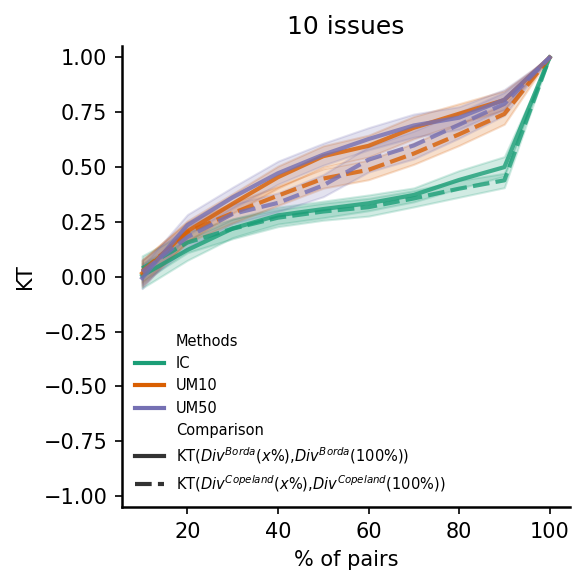

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
number_p = 10

aux = plot[(plot['number_proposals']==number_p) &\
           (plot['number_individuals']==1000)]\
    .melt(id_vars=['perc_rows','Methods'], value_vars=['Rob(DIV,WR)', 'Rob(DIV,COP)'])

aux['Comparison']= None
aux.loc[aux['variable']=='Rob(DIV,WR)','Comparison']= "KT($\mathit{Div}^\mathit{Borda}(x\%)$,$\mathit{Div}^\mathit{Borda}(100\%)$)"
aux.loc[aux['variable']=='Rob(DIV,COP)', 'Comparison']= "KT($\mathit{Div}^\mathit{Copeland}(x\%)$,$\mathit{Div}^\mathit{Copeland}(100\%)$)"
aux.head()

fig, ax = plt.subplots(figsize=(4,4), dpi=150)

g = sns.lineplot(data=aux.dropna(), \
             x='perc_rows', y='value',\
                 hue='Methods',
             linewidth=2, 
                 style='Comparison',\
                 alpha=0.8, palette='Dark2', legend=True,
              ax=ax)
leg = g.legend(title="", frameon=False, fontsize=7)
leg.get_title().set_position((-10, 0))
for line in leg.get_lines():
    line.set_linewidth(2.0)

plt.title("%s issues"%number_p)
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-1.05,1.05)
ax.set_ylabel("KT")
ax.set_xlabel("% of pairs")
plt.tight_layout()
plt.savefig("robust_%dissues.pdf"%number_p)

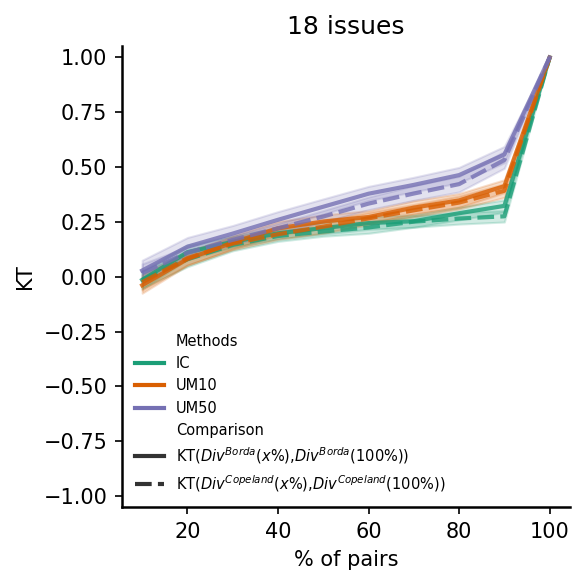

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
number_p = 18

aux = plot[(plot['number_proposals']==number_p) &\
           (plot['number_individuals']==1000)]\
    .melt(id_vars=['perc_rows','Methods'], value_vars=['Rob(DIV,WR)', 'Rob(DIV,COP)'])

aux['Comparison']= None
aux.loc[aux['variable']=='Rob(DIV,WR)','Comparison']= "KT($\mathit{Div}^\mathit{Borda}(x\%)$,$\mathit{Div}^\mathit{Borda}(100\%)$)"
aux.loc[aux['variable']=='Rob(DIV,COP)', 'Comparison']= "KT($\mathit{Div}^\mathit{Copeland}(x\%)$,$\mathit{Div}^\mathit{Copeland}(100\%)$)"
aux.head()

fig, ax = plt.subplots(figsize=(4,4), dpi=150)

g = sns.lineplot(data=aux.dropna(), \
             x='perc_rows', y='value',\
                 hue='Methods',
             linewidth=2, 
                 style='Comparison',\
                 alpha=0.8, palette='Dark2', legend=True,
              ax=ax)
leg = g.legend(title="", frameon=False, fontsize=7)
leg.get_title().set_position((-10, 0))
for line in leg.get_lines():
    line.set_linewidth(2.0)

plt.title("%s issues"%number_p)
ax.spines["left"].set_linewidth(1.2)
ax.spines["bottom"].set_linewidth(1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylim(-1.05,1.05)
ax.set_ylabel("KT")
ax.set_xlabel("% of pairs")
plt.tight_layout()
plt.savefig("robust_%dissues.pdf"%number_p)